(dataset2)=
# Datensatz 2 (Schrauben)

![screw](images/video_set.png)

Der zweite Datensatz wird aus echten Schraubenbildern erzeugt. Dafür wurden Videos der einzelnen Schrauben aufgezeichnet. Die Kameraführung wurde von Hand übernommen und bei allen Schrauben ungefähr identisch ausgeführt, um jede Schraubenklasse mit ähnlichen Perspektiven und Anzahl an Bildern zu repräsentieren. Für die Aufnahme der Videos wurde eine Beleuchtungsstation aufgebaut, um einen Schattenwurf zu vermeiden. Dafür wurde die Schraube auf einer dünnen Kunststoffunterlage platziert. Die Beleuchtung wurde von unten und oben durch je eine Lichtquelle beleuchtet, die seitliche Beleuchtung übernahm ein LED-Streifen welcher, mit entsprechendem Abstand, um die Schraube herum platziert wurde. Somit konnte ein Schattenwurf vermieden werden. Am oberen Rand des Bildes sind einzelne Lichtquellen des LED-Streifens sichtbar. Einflüsse dieser Art sollten vermieden werden, da diese vom Modell zur Erkennung des Objektes herangezogen werden könnten, was zu Fehlern in der Erkennung führen kann.

## Bilder aus Video extrahieren

````
# OpenCV importieren:
import cv2

# path = 'relativer Speicherpfad / Dateiname':
path = 'frames_from_video/torx'


# Video laden:
cap = cv2.VideoCapture('video/torx.MOV')
i = 0


# Prüfen ob ein Video geladen wurde:
if cap.isOpened() == False:
    print('ERROR: Datei nicht gefunden')
   
    
# Die Frames des Videos lesen:      
while(cap.isOpened()):
    ret, frame = cap.read()
     
    # sobald keine Frames mehr gelesen werden können (ret==False) wird abgebrochen:
    if ret == False:
        break
     
    # Die Frames speichern
    cv2.imwrite(path+str(_i)+'.jpg', frame)
    i += 1
 
cap.release()
cv.destroyAllWindows()
````

Die Frames des Videos wurden extrahiert und gespeichert.

```{note}
Alle in Keras enthaltenen vortrainierten Netze erfordern, dass die Eingabedaten quadratisch und in einer bestimmten Größe vorliegen. Außerdem erwarten sie, dass die Farbkanäle normalisiert sind. Die Normalisierung der Bilder für das Training erleichtert dem Netzwerk, sich auf die wichtigen Dinge zu konzentrieren und sich dabei nicht »ablenken« zu lassen. vgl.{cite:p}`Osinga`
```

## Vorverarbeitung der Bilder

Die Bilder sollten in Graustufen umgewandelt und auf ein quadratisches Format zugeschnitten werden. Somit kann der Datensatz auch mit vortrainierten Netzen verwendet werden.  
Es gibt die Möglichkeit, die Bilder in die [Teachable Machine](https://teachablemachine.withgoogle.com/) von Google hochzuladen. Die Bilder werden darin auf das Format 224×224 zugeschnitten. Die Schraube wird dafür aus dem Bild ausgeschnitten. Das hat den Vorteil, dass die Schraube in der Größe nicht verändert und auch nicht verzerrt wird. Diese Vorverarbeitungsschritte können auch von Hand durchgeführt werden, wie in den folgenden Abschnitten gezeigt wird.

### Bildausschnitt

Die Bibliothek PIL/Pillow kann verwenden werden, um ein Bild zu laden und die Bildmitte auszuschneiden.
vgl.{cite:p}`Osinga`

```python
# ausschneiden eines vorher festgelegten Bereichs.
from PIL import Image

img = Image.open('frames_from_video/pozidriv0.jpg')
plt.imshow(img)
w, h = img.size 
s = min(w, h) 
y = (h - s) // 2 
x = (w - s) // 2 
img_crop = img.crop((x, y, s, s))
plt.imshow(img_crop)
print("w = " + str(w))
print("h = " + str(h))
print("s = " + str(s))
print("y = " + str(y))
print("x = " + str(x))
# Osinga, Douwe. Deep Learning Kochbuch : Praxisrezepte für einen schnellen Einstieg, o'Reilly, 2019

```

Das Ausschneiden der Bildmitte, ergibt nur Sinn, wenn sich die Objekte in diesem Bereich befinden. Eine universelle Lösung, welche die Objekte auf Bildern automatisiert ausschneiden kann, wird hier gezeigt: ["Video: Crop and Save"](https://www.youtube.com/watch?v=P7r0hIP2GQ4). Den Programmcode gibts [hier](https://github.com/theAIGuysCode/yolov4-custom-functions).

### Bild verkleinern

Die Verkleinerung der Bilder sollte nach dem Ausschneiden durchgeführt werden, um möglichst wenig Informationen über das Objekt zu verlieren. Dieser Schritt geschieht bei der Umwandlung in der [Techable Machine]() automatisch. Der folgende Programmcode dient als Beispiel:

```python
# Beispiel: Bildverkleinern

import cv2

# laden
img = cv2.imread('frames_from_video/pozidriv0.jpg', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

# skalieren
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# formatieren
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

Die Bilder liegen in der bereits vorgestellten Ordnerstruktur im Hauptordner *screw_img*. Das folgende Programm speichert zunächst die Dateipfade aller Bilder in *filelist*, um anschließend alle Bilder nacheinander zu öffnen und in das Array *X_raw* zu speichern:

```python
import glob
import numpy as np
from PIL import Image

# Dateipfad von allen Dateien in den Unterordnern sammeln
filelist = glob.glob("screw_img/**/*")

# Bilder öffnen und in X_raw speichern
X_raw = np.array([np.array(Image.open(fname)) for fname in filelist])

# Format und Anzahl an Bildern anzeigen
print(X_raw.shape)
print(len(filelist))
```

```python
filelist = glob.glob("screw_img/**/*")

# mit Umwandlung in Graustufen, wenn farbige Bilder vorliegen
X_gray = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist])
print(X_gray.shape)
print(len(filelist))
```

## Schrauben Übersicht

In [13]:
pozidriv = mpimg.imread('images/pozi (1288).jpg')
kreuzschlitz = mpimg.imread('images/kreuzschlitz (1592).jpg')
philips = mpimg.imread('images/philips (1148).jpg')
innensechskant = mpimg.imread('images/innensechskant (1).jpg')
sechskant = mpimg.imread('images/sechskant (1334).jpg')
torx = mpimg.imread('images//torx (1178).jpg')

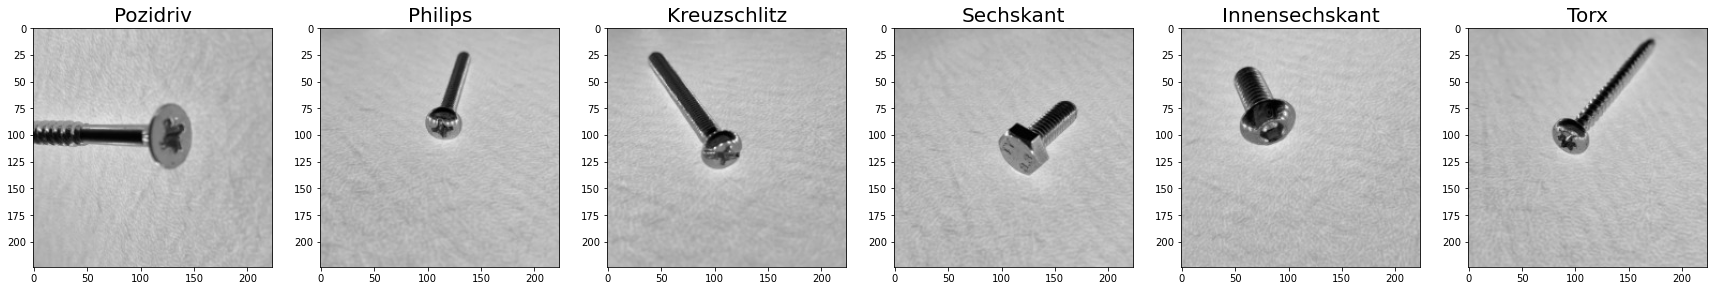

In [21]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.title('Pozidriv', fontsize=20)
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 6, 2)
plt.title('Philips', fontsize=20)
plt.imshow(philips, cmap='gray')

plt.subplot(1, 6, 5)
plt.title('Innensechskant', fontsize=20)
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 6, 6)
plt.title('Torx', fontsize=20)
plt.imshow(torx, cmap='gray')

plt.subplot(1, 6, 4)
plt.title('Sechskant', fontsize=20)
plt.imshow(sechskant, cmap='gray')

plt.subplot(1, 6, 3)
plt.title('Kreuzschlitz', fontsize=20)
plt.imshow(kreuzschlitz, cmap='gray')

#plt.suptitle('Schrauben Klassen', fontsize=32)
#plt.subplots_adjust(left=0.3, wspace=0.2, top=0.8)
plt.show()

Aus diesen sechs Schraubenarten wird nun ein Datensatz mit Labels erstellt.

In [3]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Datensatz erzeugen

### Alle Bilder in einem Ordner

Hier wird eine Möglichkeit vorgestellt, wie der Datensatz erzeugt werden kann, wenn alle Bilder in einem Ordner liegen und sich durch den Dateinamen in Klassen einordnen lassen können.

Die Labelliste muss dem Image-Array korrekt zugeordnet werden. Dafür müssen Bilder und zugehörige Labels in gleicher Reihenfolge abgespeichert werden.

In [ ]:
import glob
import numpy as np
from PIL import Image

````
# Liste mit Dateipfad anlegen
filelist = glob.glob("frames_from_video/*")

# Bilder in ein 3 Dimensionales Numpy Array speichern
X = np.array([np.array(Image.open(fname)) for fname in filelist])

# Array erweitern auf 4D-Array (n,n,n,1)
X = X.reshape(X.shape + (1,))
````

Das Bilderarray **X** wurde nun erstellt. Jetzt müssen noch die zugehörigen *Labels* erzeugt werden.

Folgende Ausgangssituationen sollen untersucht werden:
  1. Alle Bilder liegen in einem Ordner und jedes Bild besitzt Klassenname und Nummerierung im Dateinamen
  2. Jede Klasse in einem eigenen Ordner, Dateinamen benötigen lediglich eine fortlaufende Nummerierung

```python
import os

path = "dataset_from_video"
categories = [] 

for img in os.listdir(path):  # hole mir die Bezeichnung aus dem Dateinamen des Bildes, teile den Dateinamen am Leerzeichen (" ") und nutze den Klassennamen als Label
    if img.startswith("innensechskant"):
        category_, rand_str = img.split(' ') # teile auf in "innensechskant" und "28x28_gray"
        categories.append(category_)# erweitere die Labelliste mit "innensechskant"
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("philips"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("pozidriv"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("sechskant"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("torx"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
        
y=categories
print(y)
```

```python
# Label Test
i=3
print(y[i])
plt.imshow(X[i],cmap='gray')
plt.show
```

### Bilderklassen in separatem Ordner

Die Bilder liegen in folgender Ordnerstruktur vor:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

```python
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = 'C:/Users/Martin/OneDrive/Masterthesis_2022/01_Dataset/ImageDataset_Classes'

CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break  
    break
    
```

```python
training_data = []

IMG_SIZE=224


def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
```

```python
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
```

Der Datensatz (**X**,**y**) wurde erzeugt. Es besteht weiterhin die Möglichkeit den Datensatz mit dem bereits vorgestellten *Image Data Generator*, künstlich zu erweitern. Dafür werden die Bilder des bestehenden Datensatzes transformiert, wie in [Datensatz 1](dataset) gezeigt wurde. In dieser Arbeit wird der Datensatz nicht erweitert.

### Generator konfigurieren

In [ ]:
#Generator config:
gen = ImageDataGenerator (
    #width_shift_range=0,
    #height_shift_range=0,
    #rotation_range=0,
    #shear_range=0.01,
    #zoom_range=0.2,
    #fill_mode='constant',cval=255 # beste fill mode bei einfarbigen Hintergrund
)
# generate one image:
for batch in gen.flow(
    X_raw,
    shuffle=False,
):
    #print(batch.shape)
    plt.imshow(batch[0]/255)
    plt.show
    break
    
print(batch.shape)

### Datensatz erzeugen

In [ ]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=None,
    shear_range=0,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)




itr = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=10,
    shuffle=False,
    seed=None,
    save_to_dir='Dataset_vid',
    #save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


i=0

# gewünschte Anzahl an Bildern erzeugen
for i in range(0,30000):
    X, y = itr.next()
    

### Datensatz mit Keras erzeugen und erweitern

Mit dem *Image Data Generator* aus dem Keras Paket *Image data preprocessing*, kann ein Datensatz erstellt werden.
Der *Image Data Generator* bietet eine Reihe nützlicher Funktionen, um einen Datensatz aus Bildern zu erstellen und zu erweitern.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

```python
# Create a dataset.
dataset = keras.preprocessing.image_dataset_from_directory(
  'screw_img', batch_size=100, image_size=(224, 224))

data = []
labels = []




# For demonstration, iterate over the batches yielded by the dataset.
for data, labels in dataset:
    print(data.shape)  # (64, 200, 200, 3)
    print(data.dtype)  # float32
    print(labels.shape)  # (64,)
    print(labels.dtype)  # int32
    break
    
```   

```python
X_ = []
y_ = []

for features,label in dataset:
    X_.append(features)
    y_.append(label)
```

## Datensatz aufteilen in Test- und Trainingsdaten

```python
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
```

```python
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('Dataset_224x224/X_train.npy', X_train)
save('Dataset_224x224/y_train.npy', y_train)
save('Dataset_224x224/X_test.npy', X_test)
save('Dataset_224x224/y_test.npy', y_test)

```

## Datensatz Inhalt anzeigen

In [1]:
import numpy as np
from numpy import load

# Datensatz laden
X_train=load('../01_Dataset/dataset_224x224/X_train.npy').astype(np.float32)
y_train=load('../01_Dataset/dataset_224x224/y_train.npy')
X_test=load('../01_Dataset/dataset_224x224/X_test.npy').astype(np.float32)
y_test=load('../01_Dataset/dataset_224x224/y_test.npy')


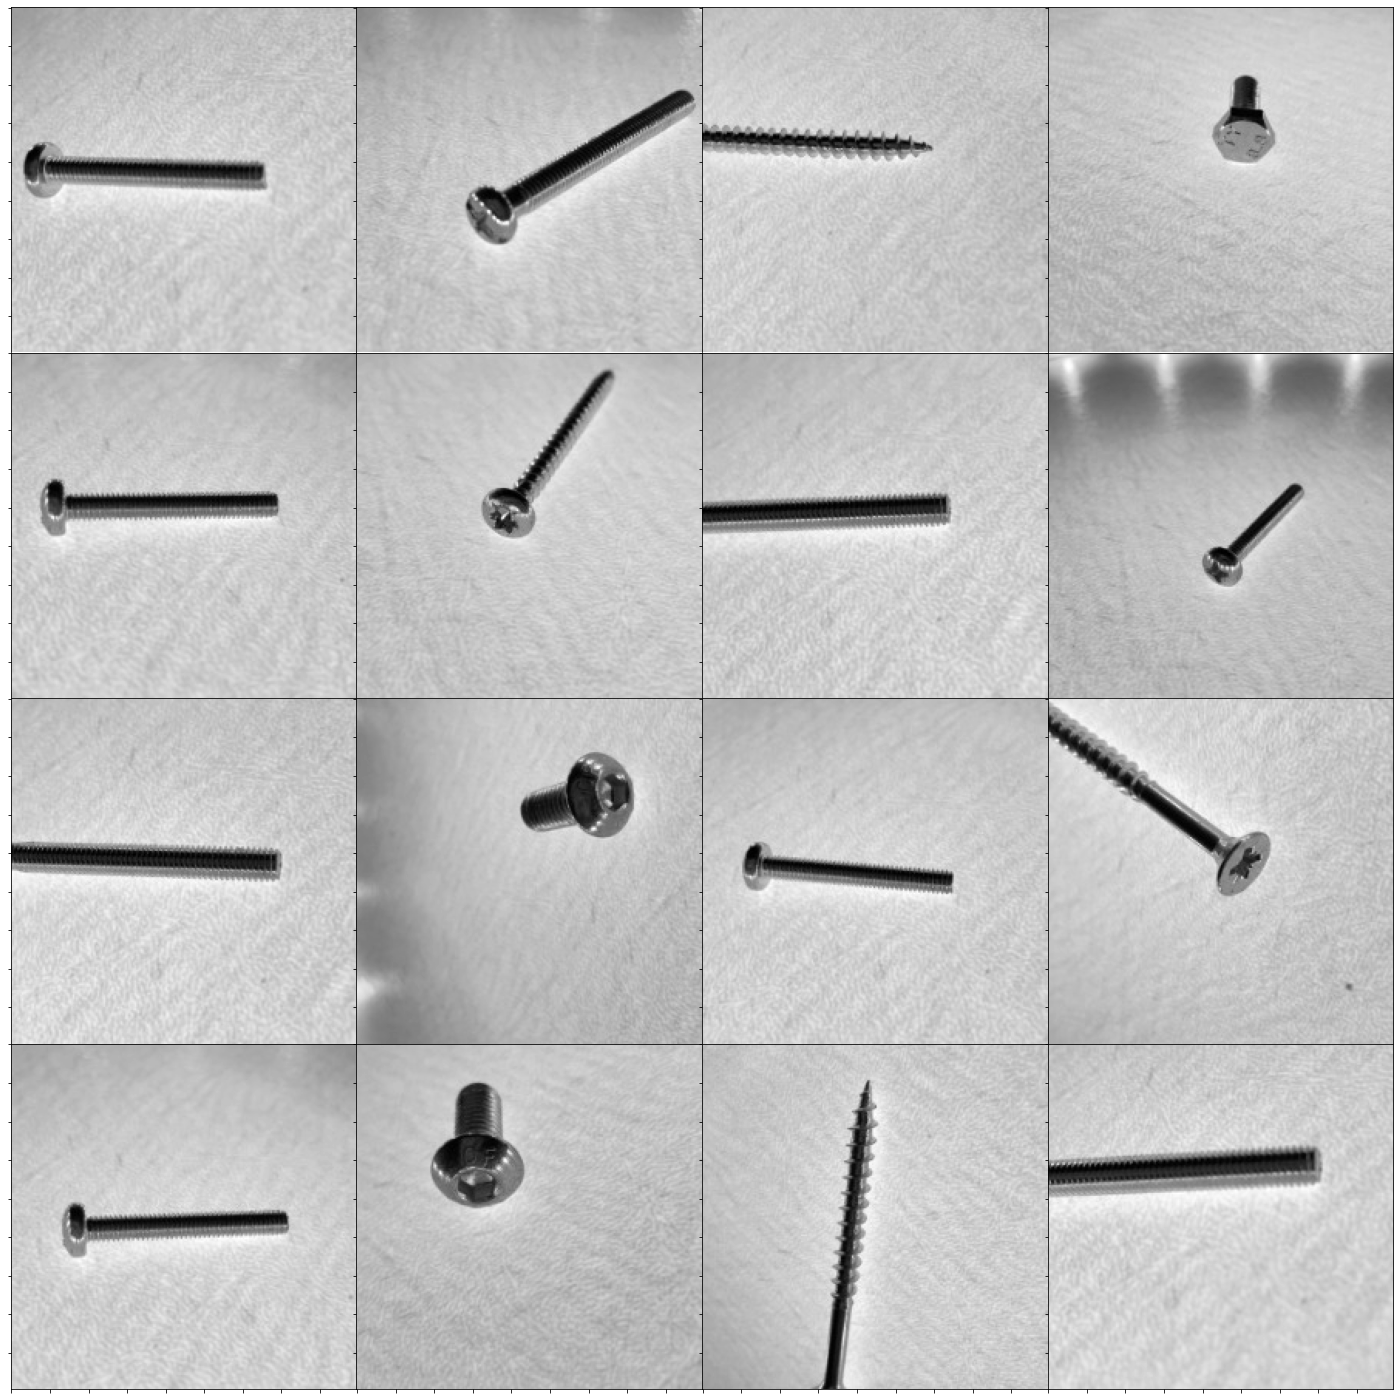

In [9]:
from matplotlib import gridspec
nrow = 4
ncol = 4


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1))

im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_train[im,:,:].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()